<a href="https://colab.research.google.com/github/NazimKs/ETL_data_warehouse/blob/main/ETL_data_warhouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet Data Warehouse : ETL

**Nom et prénom :** KESKES Nazim & DORBANE Sara

Nous importons en premier nos libraires nécéssaires pour repondre au besoin

In [2]:
import pandas as pd
import numpy as np
import decimal
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Extract

Cette étape consiste à extraire les données brutes de ces sources et à les transférer vers le système de traitement ultérieur, généralement un entrepôt de données ou un lac de données.

Dans notre cas, Notre source de données représente l'édition 2021 de la célèbre série FIFA d'EA Sports - FIFA21, Ces données sont brutes et désordonnées que nous avons les recuperer utilisant un webscraping du site sofifa.com . L'un des défis du web scraping est la présence de données non structurées, et c'est tout à fait naturel. Les développeurs front-end écrivent le HTML à leur manière, ce qui rend les données entrantes imprévisibles. 

### Context des données : 
FIFA 21 est un jeu vidéo de simulation de football publié par Electronic Arts. Le jeu comprend plus de 30 ligues officielles, plus de 700 clubs et plus de 17 000 joueurs.

Electronic Arts évalue chaque joueur en fonction de ses performances dans la vraie vie. Ce n'est pas une tâche facile, car tout le monde a son propre avis sur la qualité du joueur.

**Comment EA décide-t-il de la note des joueurs ?**

EA Sports emploie une équipe de 25 producteurs d'EA et 400 contributeurs de données externes, dirigés par le responsable de la collecte de données et des licences, Michael Mueller-Moehring. Cette équipe est chargée de garantir que toutes les données des joueurs sont à jour, tandis qu'une communauté de plus de 6 000 examinateurs de données FIFA ou de recruteurs de talents du monde entier propose constamment des suggestions et des modifications à la base de données.


Nous extrairons d'abord nos données pour les analyser et comprendre ce qu'elles comportent :

In [3]:
# Read File and assign a variable to DataFrame.

import pandas as pd

csv_file = 'fifa21_raw_data.csv'

fifa_df = pd.read_csv(csv_file)

fifa_df


/tmp/ipykernel_25703/2654005665.py:7: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa_df = pd.read_csv(csv_file)


,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,...,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,...,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,...,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,...,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,...,High,Medium,5 ★,91,85,86,94,36,59,\n273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,https://cdn.sofifa.com/players/257/710/21_60.png,Mengxuan Zhang,http://sofifa.com/player/257710/mengxuan-zhang...,China PR,CB,Zhang Mengxuan,21,47,52,\n\n\n\nChongqing Dangdai Lifan FC SWM Team\n2...,...,Low,Low,1 ★,58,23,26,27,50,48,2
18975,https://cdn.sofifa.com/players/258/736/21_60.png,Vani Da Silva,http://sofifa.com/player/258736/vani-da-silva/...,England,ST,V. Da Silva,17,47,67,\n\n\n\nOldham Athletic\n2020 ~ 2021\n\n,...,Medium,Medium,1 ★,70,46,40,53,16,40,3
18976,https://cdn.sofifa.com/players/247/223/21_60.png,Ao Xia,http://sofifa.com/player/247223/ao-xia/210005/,China PR,CB,Xia Ao,21,47,55,\n\n\n\nWuhan Zall\n2018 ~ 2022\n\n,...,Medium,Medium,1 ★,64,28,26,38,48,51,3
18977,https://cdn.sofifa.com/players/258/760/21_60.png,Ben Hough,http://sofifa.com/player/258760/ben-hough/210005/,England,CM,B. Hough,17,47,67,\n\n\n\nOldham Athletic\n2020 ~ 2021\n\n,...,Medium,Medium,1 ★,64,40,48,49,35,45,5


Nous analyons les informations et meta-données de notre source de données

In [4]:
fifa_df.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,...,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,...,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,...,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,...,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,...,High,Medium,5 ★,91,85,86,94,36,59,\n273


In [5]:
fifa_df.shape

(18979, 77)

In [6]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   photoUrl          18979 non-null  object
 1   LongName          18979 non-null  object
 2   playerUrl         18979 non-null  object
 3   Nationality       18979 non-null  object
 4   Positions         18979 non-null  object
 5   Name              18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Team & Contract   18979 non-null  object
 10  ID                18979 non-null  int64 
 11  Height            18979 non-null  object
 12  Weight            18979 non-null  object
 13  foot              18979 non-null  object
 14  BOV               18979 non-null  int64 
 15  BP                18979 non-null  object
 16  Growth            18979 non-null  int64 
 17  Joined      

#### Analyse des données recupérés : 

Chaque joueur a son propre identifiant qui comprend des informations générales à leur sujet, telles que le nom, le nom complet, la nationalité, l'âge, le club, le contrat, les postes, la taille, etc.

OVA n'est pas seulement la moyenne du joueur ; il prend également en compte des facteurs tels que les postes, la réputation internationale et la ligue dans laquelle ils jouent.

Les attributs suivants représentent la moyenne des métriques :

**Attacking** = Crossing + Finishing + Heading Accuracy + Short Passing + Volleys

**Skill** = Dribbling + Curve + FK Accuracy + Long Passing + Ball Control

**Movement** = Acceleration + Sprint Speed + Agility + Reactions + Balance

**Power** = Shot Power + Jumping + Stamina + Strength + Long Shots

**Mentality** = Aggression + Interceptions + Positioning + Vision + Penalties + Composure

**Defending** = Marking + Standing Tackle + Sliding Tackle

**Goalkeeping** = GK Diving + GK Handling + GK Kicking + GK Positioning + GK Reflexes

# 2. Transformation

Maintenant, dans cette phase les données extraites seront nettoyées, enrichies, filtrées, agrégées et transformées pour répondre aux besoins spécifiques de l'application cible. Cela peut inclure des opérations telles que la normalisation des données, la conversion de formats, la fusion de plusieurs sources de données, le calcul de nouvelles variables dérivées, ou toute autre manipulation nécessaire pour préparer les données à être chargées dans le système de destination.

- Supprimer les colonnes inutiles

In [7]:
fifa_df = fifa_df.drop(["LongName","photoUrl","playerUrl"],axis=1)

#↓OVA does not comply with the column format so we will change it to OVA

fifa_df= fifa_df.rename(columns={"↓OVA":"OVA"})

- Convertir les colonnes de taille et de poids en formes numériques

In [8]:
print(fifa_df.dtypes[['Height','Weight']])
print(fifa_df[['Height', 'Weight']])

Height    object
Weight    object
dtype: object
      Height  Weight
0       5'7"  159lbs
1       6'2"  183lbs
2       6'2"  192lbs
3      5'11"  154lbs
4       5'9"  150lbs
...      ...     ...
18974  5'10"  154lbs
18975   5'7"  128lbs
18976  5'10"  146lbs
18977   5'9"  143lbs
18978   5'9"  150lbs

[18979 rows x 2 columns]


1. Convertir les valeurs de la colonne de height en cm

In [9]:


def convert_to_cm(height):
  feet, inches = height.split("'")
  feet = int(feet)
  inches = int(inches.replace('"', ''))
  total_inches = feet * 12 + inches
  return round(total_inches * 2.54,0)

fifa_df['Height'] = fifa_df['Height'].apply(convert_to_cm)

fifa_df['Height']


0        170.0
1        188.0
2        188.0
3        180.0
4        175.0
         ...  
18974    178.0
18975    170.0
18976    178.0
18977    175.0
18978    175.0
Name: Height, Length: 18979, dtype: float64

2. Convertir les valeurs de poids de string(lbs) en int(kg)

In [10]:
def convert_to_kg(weight):
    lbs = int(weight[:-3])
    return round(lbs * 0.453592, 0)

fifa_df['Weight'] = fifa_df['Weight'].apply(convert_to_kg)

fifa_df['Weight']


0        72.0
1        83.0
2        87.0
3        70.0
4        68.0
         ... 
18974    70.0
18975    58.0
18976    66.0
18977    65.0
18978    68.0
Name: Weight, Length: 18979, dtype: float64

- Convertir les valeurs de la colonne "Joined" a un type datetime

    l'information "Joined" correspond a la date laquelle le joueur a rejoint l'équipe

In [11]:
fifa_df["Joined"]

0         Jul 1, 2004
1        Jul 10, 2018
2        Jul 16, 2014
3        Aug 30, 2015
4         Aug 3, 2017
             ...     
18974     Aug 1, 2020
18975     Aug 1, 2020
18976    Jul 13, 2018
18977     Aug 1, 2020
18978     Jan 1, 2020
Name: Joined, Length: 18979, dtype: object

In [12]:
fifa_df['Joined'] = pd.to_datetime(fifa_df.Joined)
fifa_df["Joined"]

0       2004-07-01
1       2018-07-10
2       2014-07-16
3       2015-08-30
4       2017-08-03
           ...    
18974   2020-08-01
18975   2020-08-01
18976   2018-07-13
18977   2020-08-01
18978   2020-01-01
Name: Joined, Length: 18979, dtype: datetime64[ns]

- 'Value', 'Wage' et "Release Clause' sont des colonnes de chaîne. Convertissez-les en nombres.

In [13]:
def convert_money(x):
    if "€" in x:
        x=x.replace("€","")
    if "M" in x:
        x=x.replace("M","")
        x=float(x)*1000000
        return int(x)

    elif "K" in x:
        x=x.replace("K","")
        x=float(x)*1000
        return int(x)
    else:
        return int(x)
    

fifa_df["Value"]=fifa_df["Value"].apply(convert_money)
fifa_df["Wage"]= fifa_df["Wage"].apply(convert_money)
fifa_df["Release Clause"] = fifa_df["Release Clause"].apply(convert_money)

fifa_df[["Value","Wage","Release Clause"]]

,Value,Wage,Release Clause
0,67500000,560000,138400000
1,46000000,220000,75900000
2,75000000,125000,159400000
3,87000000,370000,161000000
4,90000000,270000,166500000
...,...,...,...
18974,35000,1000,57000
18975,60000,500,165000
18976,40000,1000,70000
18977,60000,500,165000


- Certaines colonnes comportent des caractères « étoile ». Supprimez ces étoiles de ces colonnes et rendez les colonnes numériques


In [14]:
fifa_df["W/F"]=fifa_df["W/F"].str.replace("★","")
fifa_df["SM"]=fifa_df["SM"].str.replace("★","")
fifa_df["IR"]=fifa_df["IR"].str.replace("★","")
fifa_df[["W/F","SM","IR"]]

,W/F,SM,IR
0,4,4,5
1,4,5,5
2,3,1,3
3,5,4,4
4,5,5,5
...,...,...,...
18974,2,2,1
18975,2,2,1
18976,2,2,1
18977,2,2,1


- Diviser les colonnes d'équipe et de contrat et séparez-les en 2 colonnes différentes

In [15]:
fifa_df[["Team", "Contract"]] = fifa_df['Team & Contract'].str.lstrip('\n').str.rstrip('\n').str.split('\n').apply(lambda x: pd.Series([x[0], x[1]]))
fifa_df = fifa_df.drop(["Team & Contract"],axis=1)
fifa_df[["Team", "Contract"]]

,Team,Contract
0,FC Barcelona,2004 ~ 2021
1,Juventus,2018 ~ 2022
2,Atlético Madrid,2014 ~ 2023
3,Manchester City,2015 ~ 2023
4,Paris Saint-Germain,2017 ~ 2022
...,...,...
18974,Chongqing Dangdai Lifan FC SWM Team,2020 ~ 2020
18975,Oldham Athletic,2020 ~ 2021
18976,Wuhan Zall,2018 ~ 2022
18977,Oldham Athletic,2020 ~ 2021


- Supprimez les caractères de nouvelle ligne inutiles de toutes les colonnes qui en contiennent.

In [16]:
fifa_df['Hits'] = fifa_df['Hits'].replace('\n',' ',regex=True)
fifa_df['Hits']

0         372
1         344
2          86
3         163
4         273
         ... 
18974       2
18975       3
18976       3
18977       5
18978       2
Name: Hits, Length: 18979, dtype: object

- Diviser la colonne positions et garder que la colonne du poste principale

In [17]:
fifa_df[["Best Position", "2nd Position", "3rd Position"]] = fifa_df["Positions"].str.split(" ", expand=True)
fifa_df = fifa_df.drop(["Positions"],axis=1)
fifa_df[["Best Position", "2nd Position", "3rd Position"]]

,Best Position,2nd Position,3rd Position
0,RW,ST,CF
1,ST,LW,None
2,GK,None,None
3,CAM,CM,None
4,LW,CAM,None
...,...,...,...
18974,CB,None,None
18975,ST,None,None
18976,CB,None,None
18977,CM,None,None


In [18]:
fifa_df = fifa_df.drop(["2nd Position", "3rd Position"],axis=1)

- Préciser le type de contrat attribué au joueur ainsi que les dates de début et de fin de ce contrat.

In [19]:


def contrat_type(x):
    if "Free" in x:
        return "Free"
    if "Loan" in x:
        return "Loan"
    if "~" in x:
        return "Contract"
    else:
        return pd.na
    

def start_time_contract(x):
    if "~" in x:
        return  int(x[:4])
    if "Loan" in x:
        x=x.strip(" On Loan")
        x= datetime.strptime(x, "%b %d, %Y")
        return x.date()
    else:
        return pd.NA

def end_time_contract(type,contract,loan):
    if type == "Contract":
        return int(contract[-4:])
    if type == "Loan":
        loan = datetime.strptime(loan, "%b %d, %Y")
        return loan.date()
    
    else:
        return pd.NA


fifa_df["Type of contract"] = fifa_df["Contract"].apply(contrat_type)
fifa_df["Start year"] = fifa_df["Contract"].apply(start_time_contract)
fifa_df["End year"] = fifa_df.apply(lambda row: end_time_contract(row["Type of contract"],row["Contract"],row["Loan Date End"] ), axis=1)

fifa_df = fifa_df.drop(["Contract","Loan Date End"],axis=1)
fifa_df[["Type of contract","Start year","End year"]]

,Type of contract,Start year,End year
0,Contract,2004,2021
1,Contract,2018,2022
2,Contract,2014,2023
3,Contract,2015,2023
4,Contract,2017,2022
...,...,...,...
18974,Contract,2020,2020
18975,Contract,2020,2021
18976,Contract,2018,2022
18977,Contract,2020,2021


- Étant donné que les mesures de la FIFA vont de 0 à 99, une meilleure représentation de leur combinaison serait une moyenne.

In [20]:
fifa_df["Attacking"]=round((fifa_df['Crossing'] + fifa_df['Finishing'] + fifa_df['Heading Accuracy'] + fifa_df['Short Passing'] + fifa_df['Volleys'])/5,0)
fifa_df["Attacking"]=fifa_df["Attacking"].astype("int64")


fifa_df['Skill'] = round((fifa_df['Dribbling'] + fifa_df['Curve'] + fifa_df['FK Accuracy'] + fifa_df['Long Passing'] + fifa_df['Ball Control'])/5,0)
fifa_df["Skill"]=fifa_df["Skill"].astype("int64")

fifa_df['Movement'] = round((fifa_df['Acceleration'] + fifa_df['Sprint Speed'] + fifa_df['Agility'] + fifa_df['Reactions'] + fifa_df['Balance'])/5,0)
fifa_df["Movement"]=fifa_df["Movement"].astype("int64")

fifa_df['Power'] = round((fifa_df['Shot Power'] + fifa_df['Jumping'] + fifa_df['Stamina'] + fifa_df['Strength'] + fifa_df['Long Shots'])/5,0)
fifa_df["Power"]=fifa_df["Power"].astype("int64")

fifa_df['Mentality'] = round((fifa_df['Aggression'] + fifa_df['Interceptions'] + fifa_df['Positioning'] + fifa_df['Vision'] + fifa_df['Penalties'] + fifa_df['Composure'])/6,0)
fifa_df["Mentality"]=fifa_df["Mentality"].astype("int64")

fifa_df['Defending'] = round((fifa_df['Marking'] + fifa_df['Standing Tackle'] + fifa_df['Sliding Tackle'])/3,0)
fifa_df["Defending"]=fifa_df["Defending"].astype("int64")

fifa_df['Goalkeeping'] = round((fifa_df['GK Diving'] + fifa_df['GK Handling'] + fifa_df['GK Kicking'] + fifa_df['GK Positioning'] + fifa_df['GK Reflexes'])/5,0)
fifa_df['Goalkeeping']  = fifa_df["Goalkeeping"].astype("int64")

fifa_df = fifa_df.drop([ 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
    'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
    'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
    'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
    'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
    'Marking', 'Standing Tackle', 'Sliding Tackle',
    'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes'],axis=1)

- Soustraire la column potential a la valeur effictive du joueur "OVA" pour savoir sa progression (growth) dans le jeu

In [21]:
fifa_df["Growth"] =  fifa_df["POT"] - fifa_df["OVA"]


- Supprimer les colonnes non nécéssaires pour notre étude

In [22]:
fifa_df = fifa_df.drop(["POT","BOV","BP","Total Stats","Base Stats","Hits","A/W","D/W"],axis=1)

# 3. Load

L'étape de chargement (Load) consiste à prendre les données transformées et les charger dans la cible de stockage de données, généralement une base de données ou un entrepôt de données. Cette étape implique la validation des données pour s'assurer qu'elles sont conformes aux règles de qualité et de structure définies.

Voici le résultat de notre traitement des données provenant du jeu FIFA pour l'année 2021, une fois qu'elles ont été nettoyées et transformées :

In [23]:
file_path = "cleaned_fifa21_data.csv"

# Save the DataFrame to a CSV file
fifa_df.to_csv(file_path, index=False)


## Visualizations des données : 

- Ce graphique represente un histogramme des valeurs de la note globale ("Overall") des joueurs dans un ensemble de données FIFA. Les données sont regroupées en intervalles de largeur 10, allant de 40 à 100. 

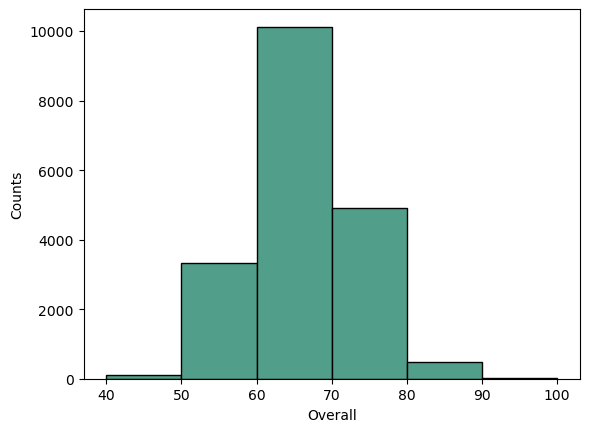

In [24]:

plt.hist(fifa_df["OVA"], bins=range(40, 100+10 , 10), edgecolor='k',color="#519E8A")
plt.ylabel("Counts")
plt.xlabel("Overall")
plt.show()

In [25]:
fifa_df['OVA']

0        93
1        92
2        91
3        91
4        91
         ..
18974    47
18975    47
18976    47
18977    47
18978    47
Name: OVA, Length: 18979, dtype: int64

#### Analyse :
La majorité des joueurs semble être concentrée dans les plages de notes globales de 60 à 80, avec le pic le plus élevé observé dans la plage de 60 à 70. Cela suggère que la majorité des joueurs ont des notes relativement moyennes dans le jeu.

Les notes globales supérieures à 80 semblent être moins fréquentes, comme en témoignent les barres plus courtes dans les plages de 80 à 90 et de 90 à 100. Cela indique que seulement un petit pourcentage de joueurs dans le jeu atteignent des notes élevées. 

Donc, la distribution des notes dans le jeu FIFA reflète en partie la réalité du monde du football. Dans le monde du football, il y a un petit nombre de superstars qui se distinguent par des performances exceptionnelles. La rareté des notes globales élevées dans le jeu reflète cette réalité en mettant l'accent sur le fait que les joueurs de classe mondiale sont rares.La rareté des superstars dans le jeu contribue également à maintenir un certain niveau de défi et d'équilibre.Si chaque équipe était remplie de joueurs de classe mondiale, le jeu perdrait de sa complexité stratégique et de son attrait compétitif. 

- Ce barplot représente la distribution des joueurs FIFA en fonction de leur poste sur le terrain,en mettant en évidence le nombre de joueurs dans chaque catégorie. 

In [26]:
position_by_order = ["GK", "LWB", "LB", "CB", "RB", "RWB", "CDM", "LM", "CM", "RM", "CAM", "LW", "CF", "RW", "ST"]


position_colors = {"GK": "blue", "LB": "green", "CB": "green", "RB": "green","LWB": "green","RWB": "green","CDM": "green",
    "LM": "orange","CM": "orange","RM": "orange","CAM": "orange","LW": "red","CF": "red", "RW": "red", "ST": "red"
}

deffensive =["LB", "CB", "RB", "LWB", "RWB", "CDM"]
midfield =["LM", "CM", "RM", "CAM"]
offensive =["LW", "CF", "RW", "ST"]

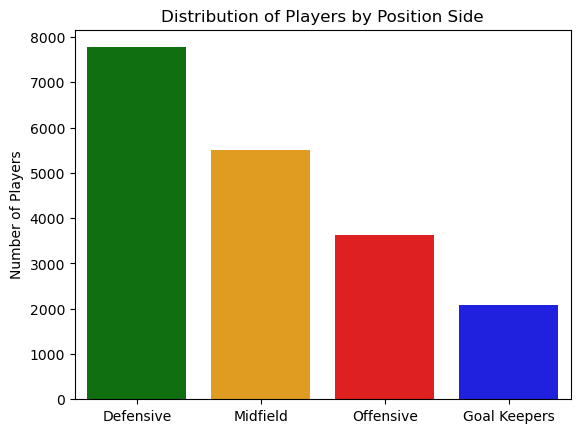

In [27]:
defensive_count = fifa_df[fifa_df["Best Position"].isin(deffensive)]["Best Position"].count()
midfield_count = fifa_df[fifa_df["Best Position"].isin(midfield)]["Best Position"].count()
offensive_count = fifa_df[fifa_df["Best Position"].isin(offensive)]["Best Position"].count()
gk_count = fifa_df[fifa_df["Best Position"] == "GK"]["Best Position"].count()


categories = ["Defensive", "Midfield", "Offensive","Goal Keepers"]
counts = [defensive_count, midfield_count, offensive_count,gk_count]

sns.set_palette(["green", "orange", "red","blue"])
sns.barplot(x=categories, y=counts)
plt.title("Distribution of Players by Position Side")
plt.ylabel("Number of Players")
plt.show()

#### Analyse : 

Avec presque 8000 défenseurs, cette catégorie semble être la plus représentée parmi les joueurs FIFA inclus dans l'échantillon. Cela suggère une forte présence de joueurs défensifs dans le jeu, ce qui correspond à la nécessité d'une solide défense dans le football réel pour sécuriser le jeu et prévenir les buts de l'adversaire. Les milieux de terrain ont un rôle crucial dans la transition entre la défense et l'attaque, et leur nombre élevé reflète l'importance stratégique de cette zone dans le football.Bien que légèrement inférieur aux défenseurs et aux milieux de terrain, le nombre d'attaquants reste significatif à 3500. Enfin, les gardiens représente la plus petite proportion des joueurs dans le jeu. 

En résumé, le graphique met en évidence l'importance numérique des défenseurs et des milieux de terrain, suivis par les attaquants, tandis que les gardiens de but sont représentés en plus petit nombre.

- Ce barplot représente la distribution des joueurs FIFA en fonction de leur position sur le terrain, et non pas seulement avec leur poste (ou catégorie) sur le terrain comme ce qu'il indique le graphique précédent. 

[]

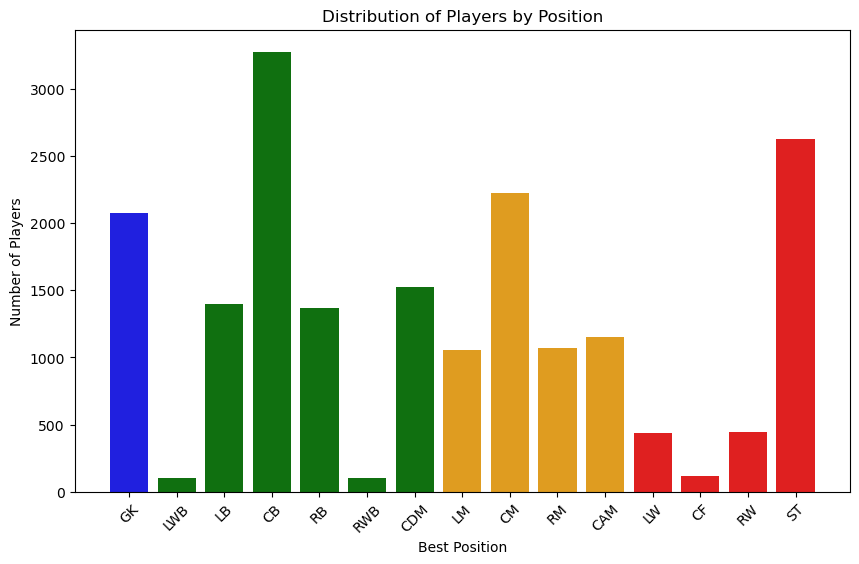

In [28]:
counts = fifa_df["Best Position"].value_counts()



values = counts.values
labels = counts.index
sns.set_palette([position_colors[pos] for pos in position_by_order])

plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)

sns.barplot(data=fifa_df,x=labels,y=values,order=position_by_order)
plt.title("Distribution of Players by Position")
plt.ylabel("Number of Players")
plt.plot()


#### Analyse : 

Le graphique révèle une distribution inégale du nombre de joueurs par position sur le terrain dans FIFA, soulignant une prépondérance des défenseurs centraux (CB) et des attaquants de pointe (ST), suivis de près par les milieux centraux (CM) et les gardiens de but (GK). Cette concentration plus élevée peut être interprétée comme une reconnaissance de l'importance cruciale de ces postes dans le jeu du football. Les défenseurs centraux assurent la solidité de la défense, tandis que les attaquants de pointe sont chargés de marquer des buts, ces deux rôles étant essentiels pour le succès d'une équipe. Les milieux centraux, quant à eux, jouent un rôle vital dans la transition entre la défense et l'attaque, tandis que les gardiens de but sont les derniers remparts pour empêcher les buts adverses.

En résumé, cette répartition souligne la manière dont le jeu FIFA cherche à reproduire fidèlement les dynamiques du football réel en mettant en lumière les postes qui ont le plus d'impact sur le résultat des matchs.


- Ce graphique represente un boxplot (ou boite a moustache) de la répartition des notes globales des joueurs FIFA par Position sur le terrain

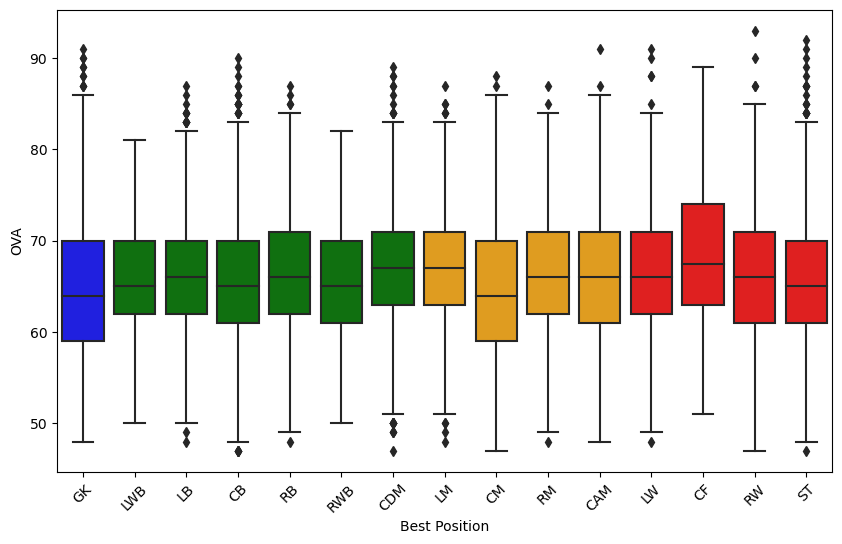

In [29]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
sns.boxplot(data=fifa_df,x="Best Position",y="OVA",order=position_by_order)
plt.show()

#### Analyse: 

La boîte à moustaches met en lumière que, malgré les variations dans le nombre de joueurs par poste, la répartition des notes globales demeure relativement équilibrée à travers toutes les positions. Cependant, une légère asymétrie se manifeste pour les attaquants, avec une inclinaison légèrement plus élevée des notes. Cette subtilité contribue à enrichir l'expérience de jeu en offrant un équilibre entre les différentes positions tout en maintenant un niveau d'excitation, notamment dans le rôle des attaquants, où les performances individuelles peuvent avoir un impact décisif sur le résultat du match.

- Ce graphe illustre la relation entre l'âge et l'esemble des notes (OVA) avec la taille indiquant le potentiel (croissance) pour les 4 catégories déférentes de joueur 

(15.0, 45.0)

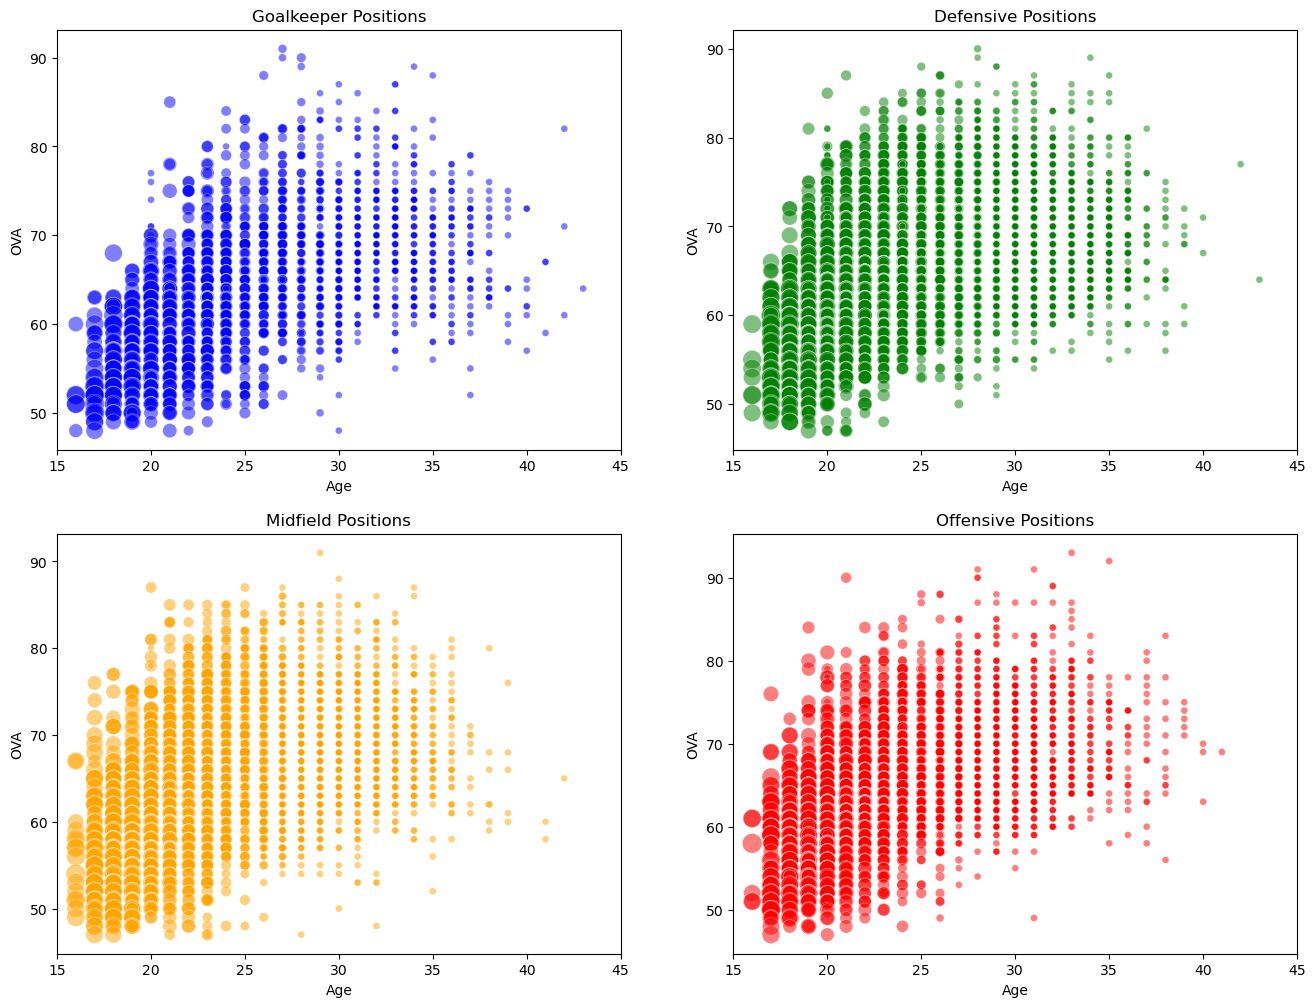

In [30]:
df_gk= fifa_df[fifa_df["Best Position"] == "GK"]
df_def = fifa_df[fifa_df["Best Position"].isin(deffensive)]
df_mid = fifa_df[fifa_df["Best Position"].isin(midfield)]
df_off = fifa_df[fifa_df["Best Position"].isin(offensive)]

plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)

sns.scatterplot(data=df_gk, x="Age", y="OVA", hue="Best Position", palette=position_colors, size="Growth", sizes=(25, 200), alpha=0.5,legend=False)
plt.xlabel("Age")
plt.ylabel("OVA")
plt.title("Goalkeeper Positions")
plt.xlim(15, 45)

plt.subplot(2, 2, 2)

sns.scatterplot(data=df_def, x="Age", y="OVA", hue="Best Position", palette=position_colors, size="Growth", sizes=(25, 200), alpha=0.5,legend=False)
plt.xlabel("Age")
plt.ylabel("OVA")
plt.title("Defensive Positions")
plt.xlim(15, 45)

plt.subplot(2, 2, 3)

sns.scatterplot(data=df_mid, x="Age", y="OVA", hue="Best Position", palette=position_colors, size="Growth", sizes=(25, 200), alpha=0.5,legend=False)
plt.xlabel("Age")
plt.ylabel("OVA")
plt.title("Midfield Positions")
plt.xlim(15, 45)



plt.subplot(2, 2, 4)

sns.scatterplot(data=df_off, x="Age", y="OVA", hue="Best Position", palette=position_colors, size="Growth", sizes=(25, 200), alpha=0.5,legend=False)
plt.xlabel("Age")
plt.ylabel("OVA")
plt.title("Offensive Positions")
plt.xlim(15, 45)


#### Analyse: 


Tout d'abord, il est observé que les joueurs ont généralement leur potentiel maximal lorsqu'ils sont jeunes, avant d'atteindre l'âge de 25 ans, dans toutes les catégories de poste. Cela suggère que la jeunesse est une période critique pour le développement des compétences et du potentiel des joueurs.

De plus, il est intéressant de noter que les gardiens et les défenseurs semblent conserver un potentiel légèrement plus élevé que les milieux de terrain et les attaquants, une fois qu'ils dépassent l'âge de 27 ans. Cela pourrait indiquer que les postes plus défensifs nécessitent moins de vitesse et d'agilité, et que les joueurs peuvent maintenir leur niveau de performance plus longtemps dans leur carrière.

Par ailleurs, à partir de l'âge de 27 ans, on observe que les attaquants et dans une moindre mesure les milieux de terrain ont tendance à avoir des notes plus élevées (OVA) que les gardiens et les défenseurs. Cela suggère que malgré la diminution du potentiel avec l'âge, les joueurs offensifs peuvent compenser cela par une meilleure maîtrise technique et une plus grande expérience tactique.




- Ce graphique représente les 10 nationalités les plus représentées dans le jeu FIFA

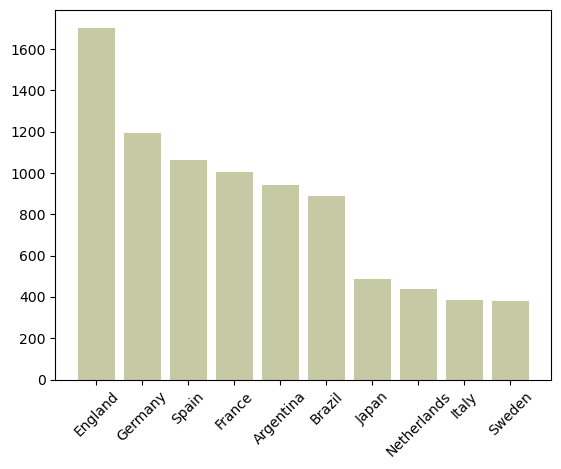

In [31]:
s=fifa_df.groupby("Nationality").size().reset_index(name="Count").sort_values(by="Count", ascending=False)
s=s[0:10]
plt.bar(s["Nationality"], s["Count"],color="#C5C9A4")
plt.xticks(rotation=45)
plt.show()

#### Analyse : 


L'analyse du graphique révèle plusieurs tendances intéressantes en ce qui concerne les nationalités les plus représentées dans le jeu FIFA. Tout d'abord, il est remarqué que les joueurs anglais sont les plus nombreux, ce qui pourrait s'expliquer par la richesse et la profondeur des divisions du championnat anglais, ainsi que par la réputation des académies de football en Angleterre qui sont réputées pour produire un grand nombre de talents.

Ensuite, l'Allemagne, l'Espagne et la France suivent de près l'Angleterre en termes de représentation dans le jeu. Cela suggère que ces pays ont investi dans le développement de leurs infrastructures footballistiques, ce qui se traduit par un nombre important de joueurs présents dans le jeu FIFA.

Enfin, l'Argentine et le Brésil occupent également une place importante parmi les nationalités représentées, bien que légèrement en retrait par rapport aux précédentes. Cela peut s'expliquer par la longue tradition de ces pays dans la production de talents footballistiques, malgré parfois un développement infrastructurel moins avancé que dans d'autres pays.

- Ce graphique illustre les 10 équipes avec le plus grand nombre de joueurs ayant un OVA supérieur à 80 dans le jeu FIFA

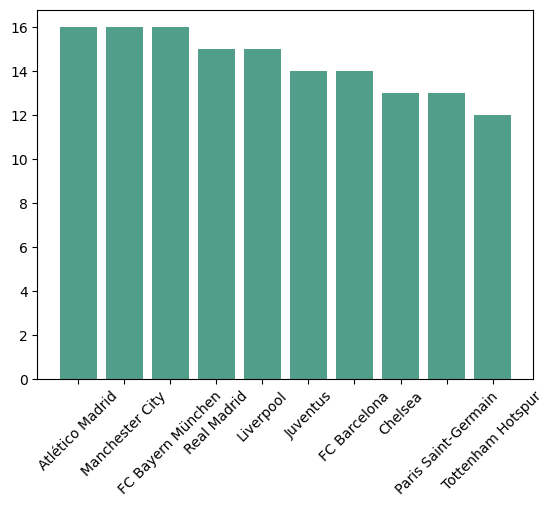

In [32]:
s=fifa_df[fifa_df["OVA"] > 80].groupby("Team").size().reset_index(name="OVA").sort_values(by="OVA", ascending=False)
s=s[0:10]
plt.bar(s["Team"], s["OVA"],color="#519E8A")
plt.xticks(rotation=45)
plt.show()

#### Analyse: 

L'analyse du graphique met en évidence un lien significatif entre les équipes ayant le plus de joueurs avec des notes OVA élevées et leur succès dans le football mondial. Les dix équipes identifiées, telles que l'Atlético Madrid, Manchester City, le FC Bayern, le Real Madrid, Liverpool, la Juventus, le FC Barcelone, Chelsea, le PSG et Tottenham, ont toutes une présence forte dans les compétitions majeures du football européen.

Ces équipes sont souvent des champions de leurs ligues nationales respectives ou ont réalisé de bons parcours dans des compétitions telles que la Ligue des Champions ou l'Europa League. Cette corrélation entre les performances des équipes sur le terrain et la qualité des joueurs présents dans le jeu FIFA renforce la validité et la représentativité de notre source de données par rapport à la réalité du football mondial.

- Ce graphique represente un diagramme circulaire des répartitions des types de contrats dans le jeu FIFA

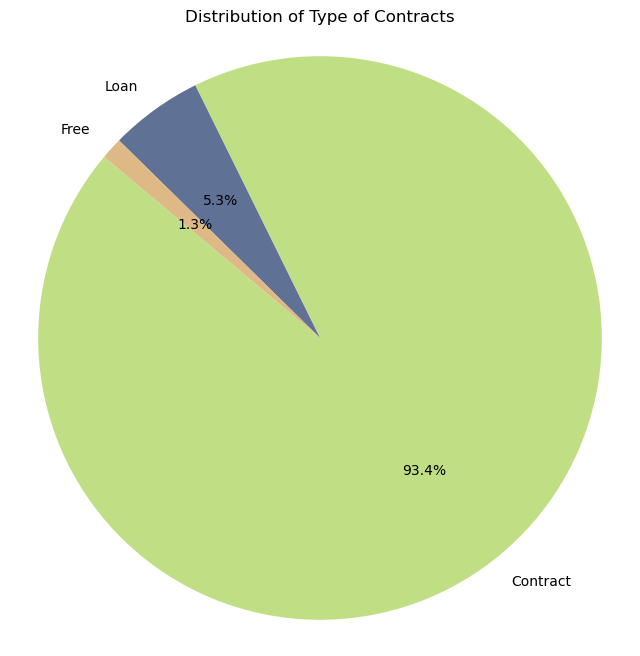

In [33]:
contract_counts = fifa_df['Type of contract'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=140,colors = ["#C0DF85","#607196","#DEB986"])
plt.title('Distribution of Type of Contracts')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Analyse: 

L'analyse du graphique révèle que la grande majorité des joueurs dans le jeu FIFA sont sous contrat permanent avec leurs clubs. En revanche, un petit pourcentage de joueurs sont soit en prêt, soit sans contrat permanent.

- Ce graphique illustre un scatter plot de la relation entre la valeur des joueurs et leurs salaires semainniers

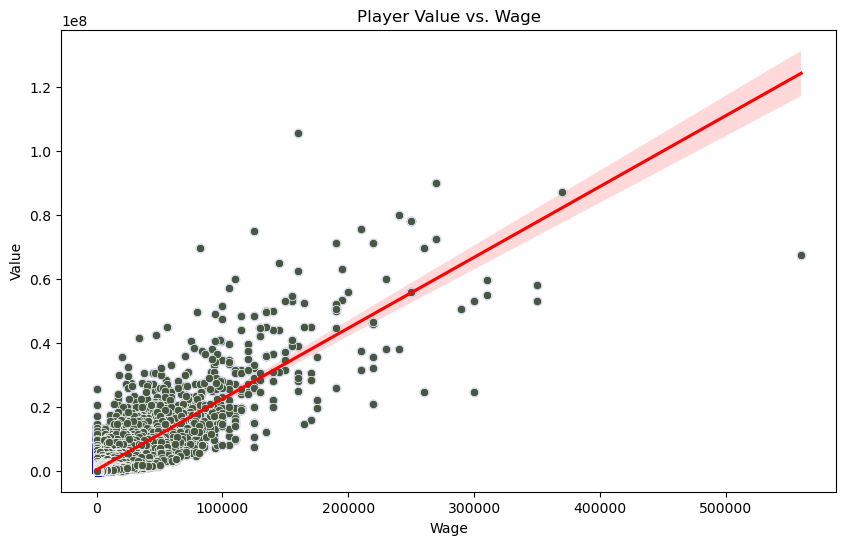

In [34]:
# Create scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Wage', y='Value', data=fifa_df, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
sns.scatterplot(x='Wage', y='Value', data=fifa_df,color="#475841")
plt.title('Player Value vs. Wage')
plt.xlabel('Wage')
plt.ylabel('Value')
plt.show()

#### Analyse : 

L'analyse du graphique met en évidence une relation linéaire entre la valeur des joueurs et leurs salaires. En général, on observe que plus la valeur d'un joueur augmente, plus son salaire augmente également, avec quelques exceptions notables.

Les joueurs situés en dessous de la diagonale représentent ceux qui sont considérés comme "overrated", c'est-à-dire qu'ils touchent un salaire élevé malgré une valeur relativement faible sur le marché des transferts. Cela peut être dû à des performances décevantes ou à des blessures récurrentes.

Inversement, les joueurs situés au-dessus de la diagonale représentent ceux qui sont considérés comme "underrated", c'est-à-dire qu'ils ont une valeur plus élevée que leur salaire ne le laisse penser. Ce sont souvent des joueurs sous-estimés par rapport à leurs performances réelles sur le terrain.

La présence de ces deux cas souligne l'importance accordée par l'équipe FIFA dans leurs source de données à tous les aspects des joueurs de football, afin de garantir un haut degré de réalisme dans le jeu.

## Conclusion : 

En conclusion, notre exploration des données FIFA par un web scraping des données du site sofifa.com pour l'année 2021 révèle l'engagement de l'équipe FIFA à reproduire fidèlement la réalité du football à travers leur jeu. En mettant en œuvre des analyses approfondies et des visualisations détaillées, ils ont démontré leur souci du détail et leur volonté de capturer chaque aspect du monde du football, depuis la répartition des joueurs selon leur poste et leur position sur le terrain jusqu'à la représentation des nationalités et des équipes les plus influentes.

De plus, l'examen de la relation entre la valeur des joueurs et leurs salaires souligne l'attention portée aux aspects économiques du football professionnel. En mettant en lumière les joueurs "overrated" et "underrated", notre analyse met en évidence les nuances de la valeur des joueurs dans le jeu FIFA.

Enfin, l'approche exhaustive de l'équipe FIFA dans la collecte, la transformation et la représentation des données témoigne de leur engagement à offrir une expérience de jeu immersive et authentique, fidèle à la richesse et à la diversité du football mondial.